# Class 13

The following notebook is based on chapter 13 from Gelman, Hill and Vehtari (2019) for logistic regression

In [1]:
#Import relvant analyis and visualition packages.
import pystan as ps
import pandas as pd
import numpy as np
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Import data

In [2]:
url = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/NES/data/nes.txt"
df = pd.read_table(url, sep = " ")
df.head(2)

,year,resid,weight1,weight2,weight3,age,gender,race,educ1,urban,...,parent_party,white,year_new,income_new,age_new,vote.1,age_discrete,race_adj,dvote,rvote
536,1952,1,1.0,1.0,1.0,25,2,1,2,2.0,...,2.0,1,1,1,-2.052455,1.0,1,1.0,0.0,1.0
537,1952,2,1.0,1.0,1.0,33,2,1,1,2.0,...,0.0,1,1,1,-1.252455,1.0,2,1.0,1.0,0.0


In [21]:
red_df = df[["rvote","income"]]
red_df = red_df.dropna()
len(red_df)

14031

# Logistic Regression with a single predictor

Linear regression models are additive and cannot handle data that is binary (Takes values of 0 or 1). In order to handle and analyse binary data with regression requires to additions to the standard $y = \alpha + \beta x$ model. These are nonlinear trnaofrmation to bound oputput to 0 and 1 and treats the results as probabilities.

The logistic function
$ logit(x) = log\left(\frac{x}{1-x}\right)$ Maps the range (0,1) and $(-\infty, \infty)$

The inverse logistic funtion  $logit^{-1}(x)=\frac{e^{x}}{1 + e^{x}}$ maps values back to the unit range


In [51]:
from scipy.special import logit, expit
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Text(0.5, 0, 'x')

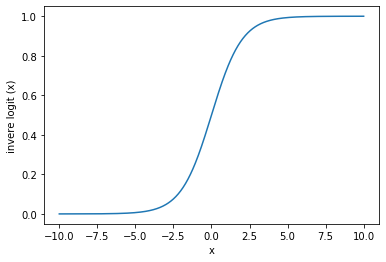

In [52]:
x = np.linspace(-10, 10, 500)
y = expit(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('invere logit (x)')
plt.xlabel('x')

## Stan Model 

In [3]:
Logistic_Regression = """

data {
  int<lower=0> N;
  vector[N] x;
  int<lower=0,upper=1> y[N];
}
parameters {
  real alpha;
  real beta;
}
model {
# Vecotired model
  y ~ bernoulli_logit(alpha + beta * x);
}

"""

In [4]:
# Comiplie stan mdoel to C++ code
sm = ps.StanModel(model_code=Logistic_Regression)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4ba6c535931a8be1a6ea353421690919 NOW.


In [36]:
data = {"N": len(red_df),
        "x": red_df["income"].values,
        "y": red_df["rvote"].astype(int)}

In [38]:
fit = sm.sampling(data = data, iter = 2000)

In [39]:
print(fit)

Inference for Stan model: anon_model_4ba6c535931a8be1a6ea353421690919.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha  -0.69  1.5e-3   0.05  -0.78  -0.72  -0.69  -0.66  -0.59   1010    1.0
beta    0.23  4.7e-4   0.02    0.2   0.22   0.23   0.24   0.26   1009   1.01
lp__   -9611    0.03   0.98  -9614  -9611  -9611  -9610  -9610   1098    1.0

Samples were drawn using NUTS at Mon Jan  4 11:17:07 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


-0.6901780707829108

<center> References<center>

Gelman, R., Hill, J., & Vehtari, A. *Regression and other stories.* New York, NY: Cambridge university press.